<a href="https://colab.research.google.com/github/ravishankar-cloud/machine-learning/blob/main/MNIST_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [111]:
np.random.seed()


In [112]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [113]:
print(X_train.shape)
print(X_test.shape)
print(y_train[:100])

(60000, 28, 28)
(10000, 28, 28)
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


In [114]:
assert(X_train.shape[0]==y_train.shape[0]), "The number of images is not equal to number of labels"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images is not equal to number of labels"
assert(X_train.shape[0]==y_train.shape[0]), "The number of images is not equal to number of labels"
assert(X_train.shape[1:]== (28,28)), "The dimensions aof the image  are not 28X28"
assert(X_test.shape[1:]== (28,28)), "The dimensions aof the image  are not 28X28"

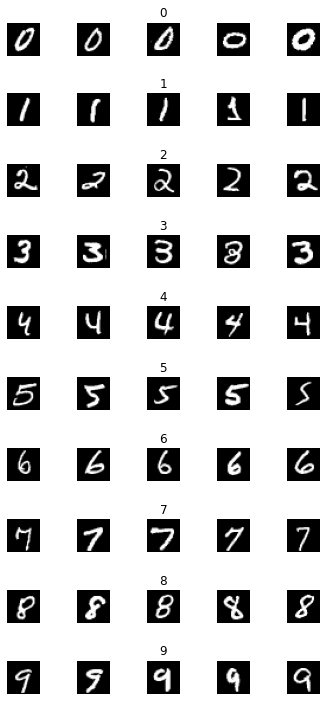

In [115]:
num_of_samples=[]

cols=5
num_classes=10
fig,axs=plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected=X_train[y_train==j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap=plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

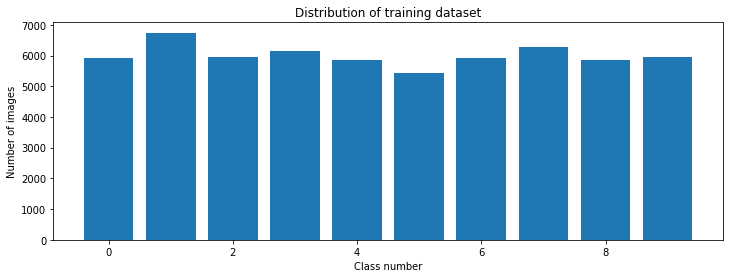

In [116]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [117]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

X_train = X_train/255 
X_test = X_test/255

In [118]:
num_pixels=784
X_train=X_train.reshape(X_train.shape[0],num_pixels)
X_test=X_test.reshape(X_test.shape[0],num_pixels)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [119]:
def create_model():
  model= Sequential()
  model.add(Dense(10, input_dim= num_pixels,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [120]:
model=create_model()
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                7850      
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
 dense_30 (Dense)            (None, 30)                330       
                                                                 
 dense_31 (Dense)            (None, 10)                310       
                                                                 
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [121]:
h = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)


Epoch 1/10
270/270 [==============================] - 2s 5ms/step - loss: 0.4990 - accuracy: 0.8417 - val_loss: 0.2614 - val_accuracy: 0.9215
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2857 - accuracy: 0.9144 - val_loss: 0.2115 - val_accuracy: 0.9362
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2529 - accuracy: 0.9249 - val_loss: 0.2005 - val_accuracy: 0.9395
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2317 - accuracy: 0.9307 - val_loss: 0.1958 - val_accuracy: 0.9403
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2243 - accuracy: 0.9331 - val_loss: 0.2051 - val_accuracy: 0.9418
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2163 - accuracy: 0.9359 - val_loss: 0.2138 - val_accuracy: 0.9393
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2117 - accuracy: 0.9368 - val_loss: 0.2163 - val_accuracy: 0.9400
Epoch 

Text(0.5, 0, 'epoch')

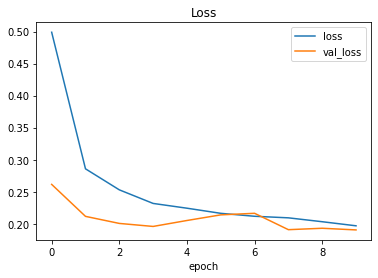

In [123]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
 

 

In [126]:
score=model.evaluate(X_test,y_test,verbose=0)
print("Test Score:",score[0])
print("Test Accuracy:",score[1])

Test Score: 0.21803738176822662
Test Accuracy: 0.9375


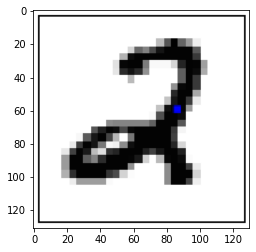

In [132]:
import requests
from PIL import Image
url="https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png"
response=requests.get(url,stream=True)
img=Image.open(response.raw)
plt.imshow(img)

(28, 28)


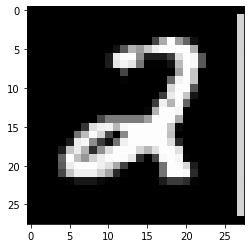

In [139]:
import cv2
img_array=np.asarray(img)
resized=cv2.resize(img_array,(28,28))
gray_scale=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
print(gray_scale.shape)
image=cv2.bitwise_not(gray_scale)
plt.imshow(image,cmap=plt.get_cmap("gray"))

In [140]:
image=image/255
image=image.reshape(1,784)

In [150]:
prediction=model.predict(image)
p=np.argmax(prediction, axis=1)
print("prediction is", p)

1/1 [==============================] - 0s 32ms/step
prediction is [2]
